In [200]:
#Importing modules
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np 

### We are provided with 2 datasets. 
#### i)  Author Information
#### ii) Revenue Information

In [201]:
#Reading Author information
df = pd.read_excel(r"C:\Users\Lakshi\Downloads\Data Analyst Case Study.xlsx",sheet_name=1) 
df

,AuhorID,Birthdate,SignDate
0,1,1992-09-03,2006-11-14
1,2,2004-06-06,2008-05-24
2,3,1955-01-06,1973-04-21
3,4,1956-09-22,1972-01-16
4,5,1997-11-30,2002-10-06
...,...,...,...
995,996,1978-03-28,1995-08-30
996,997,1983-04-09,1997-12-15
997,998,1958-05-23,2004-07-01
998,999,1964-11-19,2012-01-19


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   AuhorID    1000 non-null   int64         
 1   Birthdate  1000 non-null   datetime64[ns]
 2   SignDate   1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 23.6 KB


#### We don't have any missing values.

In [209]:
#Unique value count
df.nunique()

AuhorID      1000
Birthdate     978
SignDate      978
dtype: int64

#### The data set contains information about 1000 music authors along with date of birth and date on which they signed with publishing company.

In [210]:
#Age of Authors at the time of signing contract with publisher company
df["Age(in yrs)"] = df["SignDate"].apply(lambda x : x.year) - df["Birthdate"].apply(lambda x : x.year) 
df

,AuhorID,Birthdate,SignDate,Age(in yrs)
0,1,1992-09-03,2006-11-14,14
1,2,2004-06-06,2008-05-24,4
2,3,1955-01-06,1973-04-21,18
3,4,1956-09-22,1972-01-16,16
4,5,1997-11-30,2002-10-06,5
...,...,...,...,...
995,996,1978-03-28,1995-08-30,17
996,997,1983-04-09,1997-12-15,14
997,998,1958-05-23,2004-07-01,46
998,999,1964-11-19,2012-01-19,48


In [211]:
#Child prodigy!! -- data inconsistency
df[df["Age(in yrs)"] == 0]

,AuhorID,Birthdate,SignDate,Age(in yrs)
38,39,1956-06-10,1956-07-01,0
197,198,1993-01-03,1993-05-23,0
215,216,1980-02-19,1980-08-27,0
235,236,1981-01-19,1981-03-14,0
351,352,2011-06-04,2011-07-21,0
354,355,1979-03-23,1979-07-04,0
416,417,1976-04-13,1976-04-23,0
721,722,1954-02-25,1954-05-06,0
778,779,1989-04-06,1989-07-28,0
810,811,2004-05-06,2004-10-04,0


In [214]:
#Descriptive statistics
age_des = pd.DataFrame(round(df["Age(in yrs)"].describe(),2))
age_des

,Age(in yrs)
count,1000.00
mean,23.72
std,16.84
min,0.00
25%,9.00
50%,21.00
75%,35.00
max,70.00


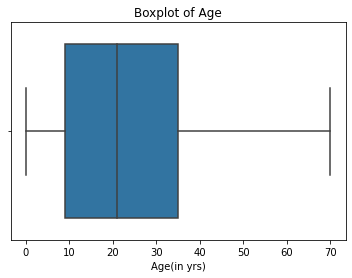

In [215]:
#Boxplot
sns.boxplot(x= df["Age(in yrs)"])
plt.title("Boxplot of Age")
plt.show() 

### To check if any date is invalid

In [217]:
#To see if day of signdate exceeds 31, month of signdate exceeds 12 and if year of signdate exceeds 2023
invalid_signdates = df[(df["SignDate"].dt.day>31)|(df["SignDate"].dt.month>12)]  #invalid signdates
invalid_signdates.shape

(0, 4)

In [218]:
#To see if day of birthdate exceeds 31, month of birthdate exceeds 12 and if year of birthdate exceeds 2023
invalid_birthdates = df[(df["Birthdate"].dt.day>31)|(df["Birthdate"].dt.month>12)|df["Birthdate"].dt.year>2023]  #invalid birthdates
invalid_birthdates.shape

(0, 4)

In [219]:
df["Year_signdate"] = df["SignDate"].dt.year  #Fetching year of signdate

In [221]:
df_year_signdate = pd.DataFrame(df.groupby("Year_signdate")["AuhorID"].count())
df_year_signdate.reset_index(inplace = True)
df_year_signdate.sort_values(by = "Year_signdate",ascending = False) 
df_year_signdate["Year_signdate"] = df_year_signdate["Year_signdate"].astype(str)
fig = px.bar(df_year_signdate.sort_values(by = "AuhorID",ascending = False).head(30), x = "Year_signdate", y = "AuhorID", title = "Number of Authors signing in given year", 
             labels = {"Year_signdate": "Year of Signdate","AuhorID": "Number of Authors"})
fig.show()

#### Here we see that a lot of authors signed with publishing company in recent years. In 2018, highest number of authors signed with publishing company followed by 2014 and 2012.

### 2. Reading Revenue information

In [222]:
df2 = pd.read_excel(r"C:\Users\Lakshi\Downloads\Data Analyst Case Study.xlsx",sheet_name=2)
df2 

,AuthorID,SongID,Year,Format,Revenue
0,66,1,2015,CD,0
1,396,2,2015,CD,0
2,92,3,2015,CD,0
3,928,4,2015,CD,19
4,642,5,2015,CD,0
...,...,...,...,...,...
235615,727,6541,2023,TV,28
235616,402,6542,2023,TV,68
235617,926,6543,2023,TV,27
235618,164,6544,2023,TV,35


In [223]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235620 entries, 0 to 235619
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorID  235620 non-null  int64 
 1   SongID    235620 non-null  int64 
 2    Year     235620 non-null  int64 
 3   Format    235620 non-null  object
 4   Revenue   235620 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 9.0+ MB


In [224]:
df2.isnull().sum()

AuthorID    0
SongID      0
 Year       0
Format      0
Revenue     0
dtype: int64

In [225]:
df2.nunique()

AuthorID    1000
SongID      6545
 Year          9
Format         4
Revenue     1150
dtype: int64

This dataset contains the information about revenue generated by songs through various channels sung by authors whose signdate and birthdate was provided in previous dataset. It also contains about 1000 music authors and has no missing values.

In [266]:
des_rev = pd.DataFrame(df2["Revenue"].describe())
des_rev 

,Revenue
count,235620.000000
mean,46.880677
std,120.066712
min,0.000000
25%,0.000000
50%,5.000000
75%,47.000000
max,1169.000000


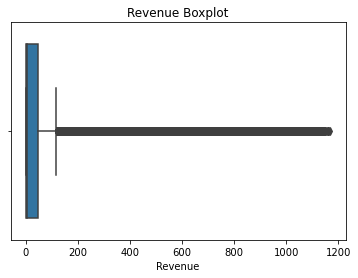

In [267]:
#Boxplot
sns.boxplot(x= df2["Revenue"])
plt.title("Revenue Boxplot")
plt.show()

In [227]:
#Correcting the spelling off author in df
df.columns = ["AuthorID","Birthdate","SignDate","Age(in yrs)","Year_signdate"]

In [228]:
#Let's merge the data!
df3 = pd.merge(df,df2, on ="AuthorID")
df3

,AuthorID,Birthdate,SignDate,Age(in yrs),Year_signdate,SongID,Year,Format,Revenue
0,1,1992-09-03,2006-11-14,14,2006,2496,2015,CD,19
1,1,1992-09-03,2006-11-14,14,2006,2871,2015,CD,0
2,1,1992-09-03,2006-11-14,14,2006,3027,2015,CD,0
3,1,1992-09-03,2006-11-14,14,2006,3101,2015,CD,0
4,1,1992-09-03,2006-11-14,14,2006,3218,2015,CD,0
...,...,...,...,...,...,...,...,...,...
235615,1000,1964-08-11,1984-09-03,20,1984,2882,2023,TV,11
235616,1000,1964-08-11,1984-09-03,20,1984,3183,2023,TV,21
235617,1000,1964-08-11,1984-09-03,20,1984,3318,2023,TV,32
235618,1000,1964-08-11,1984-09-03,20,1984,3484,2023,TV,14


In [229]:
#Dropping the age column from here 
df3.drop("Age(in yrs)",axis = 1,inplace = True)

In [230]:
#Removing spaces from column names
df3.columns = df3.columns.str.strip() 

In [231]:
#Lets have a look at distinct values for year and format!!
#Let's year & format
for i in ["Year","Format"]:
      print("Unique values in {} are {}".format(i,df3[i].unique()))

Unique values in Year are [2015 2016 2017 2018 2019 2020 2021 2022 2023]
Unique values in Format are ['CD' 'Digital' 'Radio' 'TV']


In [233]:
#Lets have a look at the revenue across these years.
df_year = pd.DataFrame(df3.groupby("Year")["Revenue"].sum())
df_year.reset_index(inplace= True) 
fig = px.bar(df_year, x= "Year", y = "Revenue", title = "Revenue Trend") #Barplot for each year
fig.show() 

In [240]:
#Number of authors each year 
authors_per_year = pd.DataFrame(df3.groupby("Year")["AuthorID"].nunique())
authors_per_year.reset_index(inplace = True)
fig = px.bar(authors_per_year, x = "Year", y = "AuthorID", title = "Number of Authors per year", labels= {"AuthorID":"Number of Authors"})
fig.show()

In [244]:
authors_per_year.columns = ["Year","No. of Authors"]

In [245]:
authors_per_year 

,Year,No. of Authors
0,2015,1000
1,2016,1000
2,2017,1000
3,2018,1000
4,2019,1000
5,2020,1000
6,2021,1000
7,2022,1000
8,2023,1000


In [251]:
#Songs per year
songs_per_year = pd.DataFrame(df3.groupby("Year")["SongID"].nunique())
songs_per_year.reset_index(inplace = True)
songs_per_year.columns = ["Year","No. of Songs"]
songs_per_year

,Year,No. of Songs
0,2015,6545
1,2016,6545
2,2017,6545
3,2018,6545
4,2019,6545
5,2020,6545
6,2021,6545
7,2022,6545
8,2023,6545


In [253]:
fig = px.bar(songs_per_year, x = "Year", y = "No. of Songs", title = "Number of songs per year")
fig.show()

#### Number of songs are constant and equal for each year. Therefore the growth in revenue hasn't come from increase in number of songs over years.

In [41]:
df3["Format"].value_counts()

Radio      58905
TV         58905
Digital    58905
CD         58905
Name: Format, dtype: int64

All the channels form equal proportion here.

In [42]:
#Lets see which channel is the highest revenue generator
#Revenue generation through different channels
df_channels = pd.DataFrame(df3.groupby("Format")["Revenue"].sum())
df_channels.reset_index(inplace= True) 
df_channels 

,Format,Revenue
0,CD,245355
1,Digital,7401232
2,Radio,2313405
3,TV,1086033


In [43]:
fig = px.pie(df_channels, names = "Format", values="Revenue",title="Revenue by Format")
fig.show()

The pie chart illustrastes that the digital channel produces most significant revenue, with radio and TV following closely behind. CD, on the other hand, generates the least amount of revenue. Undoubtedly, it demonstrates the prevailing popularity of digital channel in recent times.

In [47]:
###Lets see how the share of each channel has changed across the years
df_channel_by_year = pd.DataFrame(df3.groupby(["Year","Format"])["Revenue"].sum())
df_channel_by_year.reset_index(inplace= True) 

In [50]:
fig = px.bar(df_channel_by_year, x = "Year", y ="Revenue", color = "Format", barmode= "group",title = "Format by Year",
             labels={'Revenue': 'Revenue', 'Format': 'Format'})
fig.show()

The digital channel stands out as a noteworthy contributor to overall revenue, exhibiting a remarkable surge in growth over the years. While other channels have demonstrated growth in their revenue contributions, their rates have been comparatively slower than that of the digital channel, with CD registering the lowest growth.

In [61]:
##Which authors contribute most to the revenue?
df_revenue_per_author = pd.DataFrame(df3.groupby("AuthorID")["Revenue"].sum()) 
df_revenue_per_author.reset_index(inplace = True)
df_revenue_per_author

,AuthorID,Revenue
0,1,10888
1,2,11624
2,3,7866
3,4,14431
4,5,9712
...,...,...
995,996,13416
996,997,8126
997,998,8043
998,999,9432


In [65]:
df_revenue_per_author["AuthorID"] = df_revenue_per_author["AuthorID"].astype(str)

In [258]:
fig = px.bar(df_revenue_per_author.sort_values(by = "Revenue", ascending=[False]).head(20), x= "AuthorID", y = "Revenue",
             title = "Top Authors",
            labels={"AuthorID":"Author ID"}) #Barplot for each year
fig.show() 

In [69]:
#Lets analyse top 5 of them carefully!
#Revenue across years -- trajectory of top 5 authors
df_rev_year_author = pd.DataFrame(df3.groupby(["AuthorID","Year"])["Revenue"].sum())
df_rev_year_author.reset_index(inplace = True)
df_rev_year_author

,AuthorID,Year,Revenue
0,1,2015,466
1,1,2016,333
2,1,2017,242
3,1,2018,1289
4,1,2019,3108
...,...,...,...
8995,1000,2019,868
8996,1000,2020,1564
8997,1000,2021,853
8998,1000,2022,2485


In [90]:
#Year-on-year growth --
df_rev_year_author["YOY_Growth"] = df_rev_year_author.groupby("AuthorID")["Revenue"].pct_change()*100

In [91]:
df_rev_year_author 

,AuthorID,Year,Revenue,YOY_Growth
0,1,2015,466,NaN
1,1,2016,333,-28.540773
2,1,2017,242,-27.327327
3,1,2018,1289,432.644628
4,1,2019,3108,141.117145
...,...,...,...,...
8995,1000,2019,868,-53.358409
8996,1000,2020,1564,80.184332
8997,1000,2021,853,-45.460358
8998,1000,2022,2485,191.324736


In [92]:
#Lets look at the growth rate of music authors with highest contribution to revenue
df_rev_year_top5authors = df_rev_year_author[df_rev_year_author["AuthorID"].isin(l)]
df_rev_year_top5authors  

,AuthorID,Year,Revenue,YOY_Growth
432,49,2015,3081,NaN
433,49,2016,2857,-7.270367
434,49,2017,4091,43.192160
435,49,2018,2291,-43.999022
436,49,2019,2329,1.658664
437,49,2020,2492,6.998712
438,49,2021,5074,103.611557
439,49,2022,2344,-53.803705
440,49,2023,3150,34.385666
1269,142,2015,0,NaN


In [259]:
l = [49,964,923,142,640]

In [260]:
df_rev_year_author1 = df_rev_year_author[df_rev_year_author["AuthorID"].isin(l)]

In [261]:
df_rev_year_author1["AuthorID"] = df_rev_year_author1["AuthorID"].astype(str)

<ipython-input-261-00c80780a3b7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [262]:
fig = px.line(df_rev_year_author1, x = "Year", y ="Revenue", color = "AuthorID",
              title = "Trajectory of top 5 Authors",
             labels={'Revenue': 'Revenue', 'AuthorID': 'Author ID'})
fig.show()

Each author's revenue trajectory lacks smoothness, characterized by sharp spikes. Take, for instance, author 964, whose revenue experienced a rapid ascent in 2017, surpassing 5000, only to sharply decline to 3000 and so forth.

In [105]:
#Lets look at next 5 music authors!!
l2 = [238,775,974,164,652]
df_rev_year_author2 = df_rev_year_author[df_rev_year_author["AuthorID"].isin(l2)]
df_rev_year_author2["AuthorID"] = df_rev_year_author2["AuthorID"].astype(str)
fig = px.line(df_rev_year_author2, x = "Year", y ="Revenue", color = "AuthorID",
              title = "Trajectory of next top 5 Authors",
             labels={'Revenue': 'Revenue', 'AuthorID': 'Author ID'})
fig.show()

<ipython-input-105-11f768274081>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Marked by sharp spikes. None of trajectories showing an increasing pattern. For all the msuic authors, revenue earned each year fluctuates sharply. For authorID 775, the revenue generated continues to increase successively after 2020.

In [144]:
#Let's see which author sang the highest number of songs! is it same as the one whose revenue contribution is highest..
df_song_auth = pd.DataFrame(df3.groupby("AuthorID")["SongID"].count())
df_song_auth.reset_index(inplace = True)
df_song_auth["AuthorID"] = df_song_auth["AuthorID"].astype(str)
fig = px.bar(df_song_auth.sort_values(by = "SongID", ascending = False).head(20), x = "AuthorID", y = "SongID", title= "Songs by Music Authors",
            labels = {"AuthorID" : "Music Author ID", "SongID": "Number of Songs"})
fig.show() 

From the plot, it's evident that the music author making the highest revenue also holds the record for producing the greatest number of songs. The top five contributors to revenue are likewise included among the top ten authors with the highest song count.

#### Now let's look at songs!

In [114]:
##Highest revenue generating songs
df_rev_song = pd.DataFrame(df3.groupby("SongID")["Revenue"].sum())
df_rev_song.reset_index(inplace= True)
df_rev_song["SongID"] = df_rev_song["SongID"].astype(str)
fig = px.bar(df_rev_song.sort_values(by ="Revenue", ascending= False).head(10), x = "SongID", y="Revenue", title="Top 10 songs", labels={"SongID":"Song ID"})
fig.show()

In [115]:
#Can draw intervals 
bins = [0,500,1000,1500,2000,2500,3000]
df_rev_song["Revenue_Interval"] = pd.cut(df_rev_song["Revenue"],bins)
df_rev_song 

,SongID,Revenue,Revenue_Interval
0,1,2157,"(2000, 2500]"
1,2,1091,"(1000, 1500]"
2,3,1914,"(1500, 2000]"
3,4,1782,"(1500, 2000]"
4,5,1278,"(1000, 1500]"
...,...,...,...
6540,6541,1368,"(1000, 1500]"
6541,6542,1182,"(1000, 1500]"
6542,6543,1271,"(1000, 1500]"
6543,6544,1645,"(1500, 2000]"


In [199]:
df_rev_song1 = pd.DataFrame(df_rev_song.groupby("Revenue_Interval")["SongID"].count()) 
df_rev_song1.reset_index(inplace= True)
df_rev_song1["Revenue_Interval"] = df_rev_song1["Revenue_Interval"].astype(str)
fig = px.bar(df_rev_song1, x="Revenue_Interval", y="SongID",
             title="Number of songs in Revenue category",
             labels={"Revenue_Interval": "Revenue", "SongID": "Number of Songs"})
fig.show() 

In [135]:
##Trajectory of top 10 songs over time
rev_per_song10=df3.groupby('SongID')['Revenue'].sum().sort_values(ascending=False).iloc[:10].index
rev_top10_songs=list(rev_per_song10)
df_song_year = pd.DataFrame(df3.groupby(["SongID","Year"])["Revenue"].sum())
df_song_year.reset_index(inplace = True)
df_top10_song_year = df_song_year[df_song_year["SongID"].isin(rev_top10_songs)]

fig = px.line(df_top10_song_year, x = "Year", y ="Revenue", color = "SongID",
              title = "Song performance",
            labels={'Revenue': 'Revenue', 'SongID': 'Song ID'})
fig.show()

We observe that song performance declines over time. Here we see sharp spike in few songs then decline afterwards which may be attributed to data inconsistency.

In [86]:
##Let's look at revenue generated by top 10 songs by format
k=df3.groupby(['AuthorID','SongID','Format'])['Revenue'].sum().reset_index()
rev_per_song=df3.groupby('SongID')['Revenue'].sum().sort_values(ascending=False).iloc[:10].index
rev_per_song1=list(rev_per_song)
df_fin = k[k["SongID"].isin(rev_per_song1)]
df_fin["SongID"] = df_fin["SongID"].astype(str)
fig = px.bar(df_fin, x = "SongID", y ="Revenue", color = "Format", barmode= "group",title = "Top 10 songs by Format",
             labels={'Revenue': 'Revenue', 'SongID': 'Song ID'})
fig.show()

<ipython-input-86-52543ff01f27>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



It is evident that the highest revenue among the top songs was generated predominantly through the digital channel, trailed by radio and TV, with CD making the smallest contribution.

In [88]:
##Lets look at revenue per song!
##Number of songs per author
df_songs_per_author = pd.DataFrame(df3.groupby("AuthorID")["SongID"].count())
df_songs_per_author.reset_index(inplace = True)
df_songs_per_author.sort_values(by = "SongID",ascending=False)
df_rev_per_auth = pd.DataFrame(df3.groupby("AuthorID")["Revenue"].sum())
df_rev_per_auth.reset_index(inplace = True)
df_rev_per_auth
df_new = pd.merge(df_songs_per_author,df_rev_per_auth, on = "AuthorID")
df_new.sort_values(by = "Revenue",ascending=False).head(20) 
df_new["Revenue_per_song"] = df_new["Revenue"]/df_new["SongID"]
df_new.sort_values(by = ["Revenue","Revenue_per_song"],ascending=[False, False]).head(30)

,AuthorID,SongID,Revenue,Revenue_per_song
48,49,576,27709,48.105903
963,964,468,24744,52.871795
922,923,540,24185,44.787037
141,142,576,23904,41.500000
639,640,468,23717,50.677350
237,238,468,22577,48.241453
774,775,504,22083,43.815476
973,974,432,21952,50.814815
163,164,432,21938,50.782407
651,652,432,21801,50.465278


In [106]:
fig = px.scatter(df_new.sort_values(by = ["Revenue","Revenue_per_song"],ascending=[False, False]).head(1000), x = "SongID", y = "Revenue",
                   size = "Revenue_per_song",color = "AuthorID", hover_data=["AuthorID","Revenue_per_song"],title = "Revenue per song for each author",
                labels={"Revenue_per_song": "Revenue per song", "SongID":"Number of Songs"})
fig.show()

Here we see that authorID 49 has generated highest revenue per song. Further, we see that authors who are top contributors to revenue also have high revenue per song.

In [159]:
#Total revenue each year
df_rev_year_per_author = pd.DataFrame(df3.groupby(["Year","AuthorID"])["Revenue"].sum())
df_rev_year_per_author.reset_index(inplace= True)
df_rev_year_per_author

,Year,AuthorID,Revenue
0,2015,1,466
1,2015,2,1154
2,2015,3,0
3,2015,4,1302
4,2015,5,1403
...,...,...,...
8995,2023,996,1798
8996,2023,997,2360
8997,2023,998,1326
8998,2023,999,877


In [167]:
df_rev_distribution = pd.DataFrame(df3.groupby("AuthorID")["Revenue"].sum())
df_rev_distribution["Revenue_Interval"] = pd.cut(df_rev_distribution["Revenue"], bins = 10)
df_rev_distribution.reset_index(inplace = True)
df_rev_distribution.sort_values(by = "Revenue_Interval",ascending = True)

,AuthorID,Revenue,Revenue_Interval
173,174,2665,"(1075.393, 3762.7]"
690,691,2471,"(1075.393, 3762.7]"
958,959,3655,"(1075.393, 3762.7]"
868,869,3314,"(1075.393, 3762.7]"
229,230,1102,"(1075.393, 3762.7]"
...,...,...,...
963,964,24744,"(22387.6, 25048.3]"
141,142,23904,"(22387.6, 25048.3]"
922,923,24185,"(22387.6, 25048.3]"
639,640,23717,"(22387.6, 25048.3]"


In [172]:
df_rev_distribution_fin = pd.DataFrame(df_rev_distribution.groupby("Revenue_Interval")["AuthorID"].count())
df_rev_distribution_fin.reset_index(inplace = True)
df_rev_distribution_fin["Revenue_Interval"] = df_rev_distribution_fin["Revenue_Interval"].astype(str)
fig = px.bar(df_rev_distribution_fin, x = "AuthorID", y = "Revenue_Interval", title = "Revenue distribution by Authors",labels={"Revenue_Interval":"Revenue","AuthorID":"Number of Authors"})
fig.show()

In [169]:
df_rev_distribution_fin 

,Revenue_Interval,AuthorID
0,"(1075.393, 3762.7]",45
1,"(3762.7, 6423.4]",103
2,"(6423.4, 9084.1]",200
3,"(9084.1, 11744.8]",247
4,"(11744.8, 14405.5]",173
5,"(14405.5, 17066.2]",138
6,"(17066.2, 19726.9]",60
7,"(19726.9, 22387.6]",28
8,"(22387.6, 25048.3]",5
9,"(25048.3, 27709.0]",1


In [183]:
#Do younger authors generate more revenue?
df3["Present Age(in yrs)"] = df3["Year"] - df3["Birthdate"].dt.year

In [184]:
df4 

,AuthorID,Birthdate,SignDate,SongID,Year,Format,Revenue,Age(in yrs),Present Age(in yrs)
0,1,1992-09-03,2006-11-14,2496,2015,CD,19,23,23
1,1,1992-09-03,2006-11-14,2871,2015,CD,0,23,23
2,1,1992-09-03,2006-11-14,3027,2015,CD,0,23,23
3,1,1992-09-03,2006-11-14,3101,2015,CD,0,23,23
4,1,1992-09-03,2006-11-14,3218,2015,CD,0,23,23
...,...,...,...,...,...,...,...,...,...
235615,1000,1964-08-11,1984-09-03,2882,2023,TV,11,59,59
235616,1000,1964-08-11,1984-09-03,3183,2023,TV,21,59,59
235617,1000,1964-08-11,1984-09-03,3318,2023,TV,32,59,59
235618,1000,1964-08-11,1984-09-03,3484,2023,TV,14,59,59


In [191]:
df4 = df3
df4["Age_Interval"] = pd.cut(df4["Present Age(in yrs)"], bins=10)
#df4.reset_index(inplace = True)
#df4.sort_values(by = "Age_Interval",ascending = True)

In [196]:
df_age_rev = pd.DataFrame(df4.groupby(["Age_Interval","Year"])["AuthorID"].count())
df_age_rev.reset_index(inplace = True)
df_age_rev["Age_Interval"] = df_age_rev["Age_Interval"].astype(str)
fig = px.bar(df_age_rev, x = "Age_Interval", y = "AuthorID", color = "Year",
             labels = {"AuthorID":"Number of Authors","Age_Interval":"Age of Authors"})
fig.show()